In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lsst.sims.maf.db as db
from lsst.sims.maf.utils import m52snr
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.plots as plots

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.utils import equatorialFromGalactic, hpid2RaDec, _healbin, healbin
from lsst.utils import getPackageDir
from mafContrib import TdePopMetric, generateTdePopSlicer, Tde_lc
import healpy as hp
import os


In [2]:
# Generate the slicer which puts 10,000 events at random spots on the sphere
slicer = generateTdePopSlicer()

In [3]:
metric = TdePopMetric()

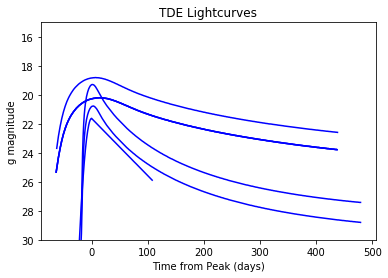

In [11]:

for i in np.arange(7):
    t = np.arange(-100, 500)
    lc = metric.lightcurves.interp(t, 'g', lc_indx=slicer.slicePoints['file_indx'][i])
    good = np.where(lc < 31)[0]
    plt.plot(t[good], lc[good], color='blue', label='%i, g' % i)
    #lc = metric.lightcurves.interp(t, 'z', lc_indx=slicer.slicePoints['file_indx'][i])
    #plt.plot(t, lc, color='red', label='%i, z' % i)
plt.ylim([30,15])
plt.xlabel('Time from Peak (days)')
plt.ylabel('g magnitude')
plt.title('TDE Lightcurves')
plt.savefig('tde_lc.pdf')

Text(0.5, 1.0, 'TDE Lightcurves')

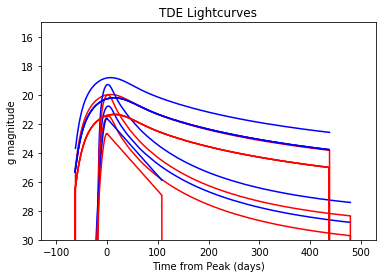

In [10]:
for i in np.arange(7):
    t = np.arange(-100, 500)
    lc = metric.lightcurves.interp(t, 'g', lc_indx=slicer.slicePoints['file_indx'][i])
    good = np.where(lc < 31)[0]
    plt.plot(t[good], lc[good], color='blue', label='%i, g' % i)
    lc = metric.lightcurves.interp(t, 'z', lc_indx=slicer.slicePoints['file_indx'][i])
    plt.plot(t, lc, color='red', label='%i, z' % i)
plt.ylim([30,15])
plt.xlabel('Time from Peak (days)')
plt.ylabel('g magnitude')
plt.title('TDE Lightcurves')